In [1]:
import sys; sys.path.append("/home/david_tyuman/my_github/cv_fall_2022_dev/")

In [4]:
from lib.datasets import ImageClassifyDataset
import pathlib

In [21]:
dt = ImageClassifyDataset(
    inclusion_condition=lambda filename: True,
    data_dir=pathlib.Path("/var/lib/storage/data/cv_fall_2022/lesson_8_detection_metric/images"),
    markup=ImageClassifyDataset.read_markup(
        "/var/lib/storage/data/cv_fall_2022/lesson_8_detection_metric/gt.csv"
    ),
    new_size=(32, 32),
    transforms=None,
    classes_num=205
)

dt
i = 0

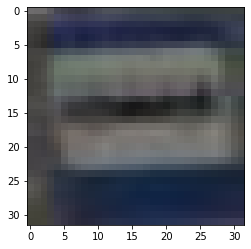

In [85]:
from matplotlib import pyplot as plt
i += 1
plt.imshow(dt[i][0].numpy().transpose(1, 2, 0))

In [216]:
import csv

with open("/var/lib/storage/data/cv_fall_2022/lesson_8_detection_metric/gt.csv", "r") as f:
    reader = csv.reader(f)
    keys = next(reader)
    for raw_line in reader:
        new_line = {k: raw_line[i] for i, k in enumerate(keys)}
        print(new_line)
        break
    

{'filename': 'cropped_train.1.1.023554.png', 'class_id': '0', 'class_name': '1.1', 'class_type': 'freq'}


In [86]:
!ls /var/lib/storage/resources/cv_fall_2022/lesson_8_detection_metric/pools

train_pool.test.base  val_pool.test.base


In [124]:
from torch.utils.data import DataLoader
import pickle

with open("/var/lib/storage/resources/cv_fall_2022/lesson_8_detection_metric/pools/train_pool.test.base", "rb") as f:
    dataloader = DataLoader(
        dataset=pickle.load(f),
        batch_size=5000,
        shuffle=True
    )

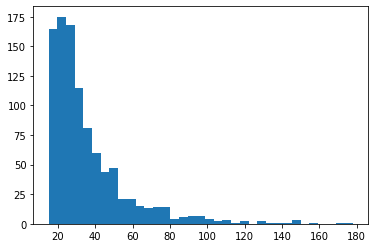

In [140]:
# for tmp in dataloader:
#     break
    
plt.hist(tmp[-1][:, [0, 1]].numpy()[:, 0], 35);

In [150]:
(tmp[-1][:, [0, 1]].numpy()[:, 1] < 50).mean()

0.835